In [664]:
import csv
import numpy as np
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [665]:
vaccitantions_analyse_url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-age-group.csv'
urlretrieve(vacitantions_analyse_url, 'vacitantions_analyse_url.csv')

('vacitantions_analyse_url.csv', <http.client.HTTPMessage at 0x1bf54240f10>)

In [666]:
vaccinations_df = pd.read_csv('vacitantions_analyse_url.csv')

In [667]:
vaccinations_df

,location,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,2020-01-01,100+,0.00,0.00,0.0
1,Argentina,2020-01-01,12-17,0.00,0.00,0.0
2,Argentina,2020-01-01,18-29,0.00,0.00,0.0
3,Argentina,2020-01-01,3-11,0.00,0.00,0.0
4,Argentina,2020-01-01,30-39,0.00,0.00,0.0
...,...,...,...,...,...,...
48227,Uruguay,2021-07-09,35-44,81.24,73.55,NaN
48228,Uruguay,2021-07-09,45-54,84.00,78.39,NaN
48229,Uruguay,2021-07-09,55-64,88.66,84.06,NaN
48230,Uruguay,2021-07-09,65-74,89.78,78.87,NaN


In [668]:
vaccinations_df.drop(vaccinations_df[vaccinations_df.people_fully_vaccinated_per_hundred > 100].index, inplace=True)

In [669]:
new_vaccinations_df=vaccinations_df[['location','date','age_group','people_fully_vaccinated_per_hundred']]


In [670]:
new_vaccinations_df.set_index('date', inplace=True)

In [671]:
vaccination_after2021_df=new_vaccinations_df.loc['2021-12-31']

In [672]:
mean_of_vaccination=vaccination_after2021_df.groupby('location')[['people_fully_vaccinated_per_hundred']].mean()

In [673]:
mean_of_vaccination.rename(columns = {'people_fully_vaccinated_per_hundred':'mean_of_people_fully_vaccinated_per_hundred'}, inplace = True)

In [674]:
mean_of_vaccination=mean_of_vaccination.sort_values('mean_of_people_fully_vaccinated_per_hundred', ascending=False).round(2)

In [675]:
mean_of_vaccination

,mean_of_people_fully_vaccinated_per_hundred
location,
Australia,88.76
Japan,88.57
Sweden,84.66
Malta,81.81
Argentina,80.83
Norway,80.11
Belgium,79.23
Italy,77.34
France,76.80


In [676]:
mean_of_vaccination.to_csv('Vaccination_result_after_2021.csv')

In [677]:
sns.set_style("darkgrid")

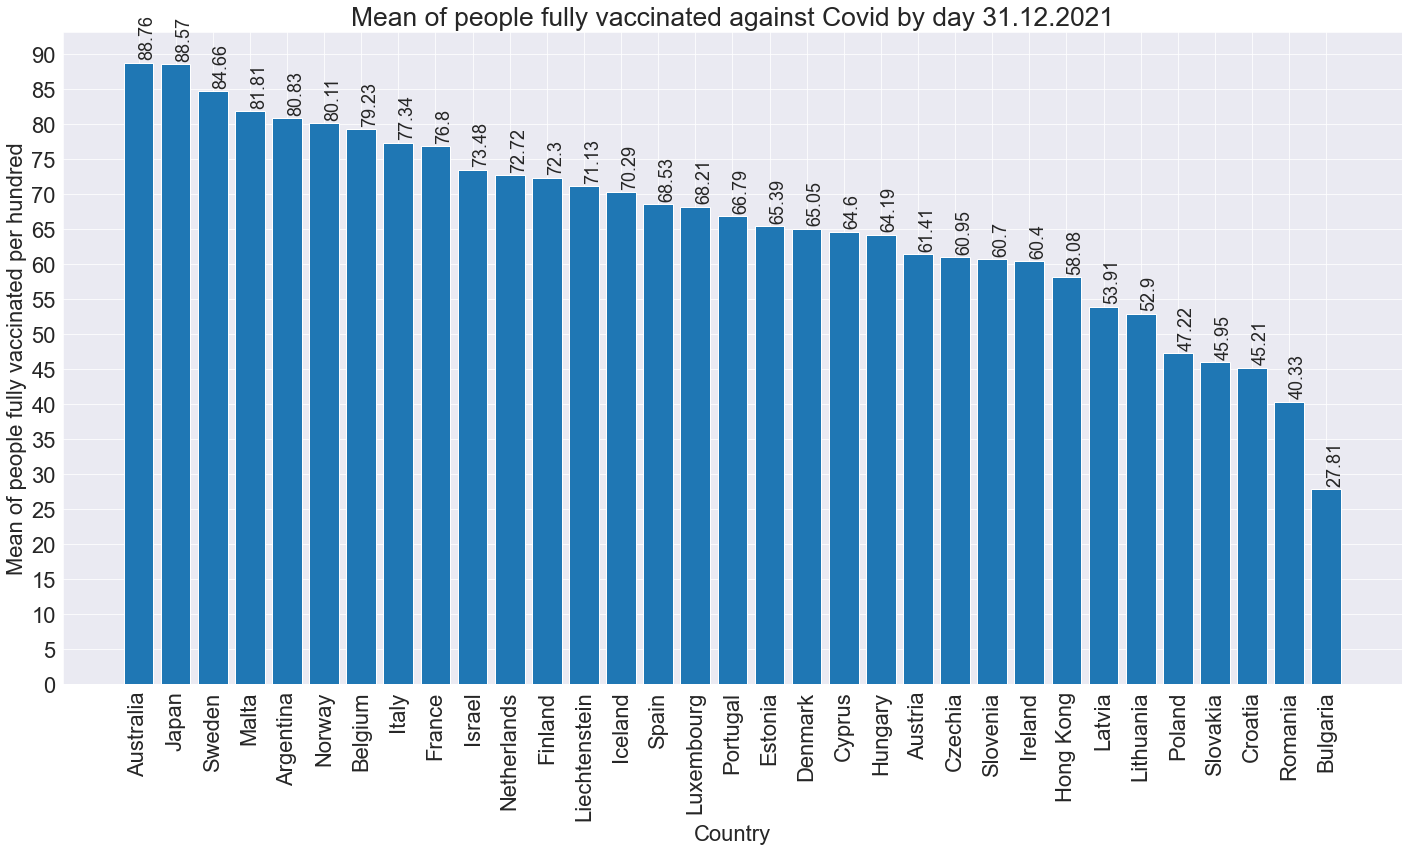

In [678]:
plt.figure(figsize=(24,12))
plt.rcParams['font.size'] = 22
plt.title("Mean of people fully vaccinated against Covid by day 31.12.2021")
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 120, 5))
plt.xlabel('Country')
plt.ylabel('Mean of people fully vaccinated per hundred')
for index,data in enumerate(after2021_df_mean.mean_of_people_fully_vaccinated_per_hundred):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=18),rotation=90)

plt.bar(after2021_df_mean.index,after2021_df_mean.mean_of_people_fully_vaccinated_per_hundred);